# Anggota Kelompok
- Akhmadheta Hafid Prasetyawan
- Fauzan Pradana
- Taufik Anwar

# Sentimen Analisis pada Aplikasi Cek Bansos Berdasarkan Ulasan Pengguna
Aplikasi “Aplikasi Cek Bansos” merupakan aplikasi berbasis mobile yang diluncurkan oleh Kementerian Sosial (Kemensos) pada layanan google play store. Kemensos meluncurkan aplikasi berbasis mobile untuk mempermudah masyarakat Indonesia dalam mendapatkan informasi terkiat bantuan sosial, mengutip dari website GoodStats, menginformasikan bahwa berdasarkan laporan dari perusahaan riset Data Reportal mengatakan bahwa jumlah pengguna perangkat seluler di Indonesia pada tahun 2022 mencapai 370,1 juta. Jumlah tersebut meningkat sebesar 13 juta atau 3.6 persen.

Setiap aplikasi yang di publikasi pada layanan google playstore dapat diberikan ulasan oleh pengguna. Fitur ulasan ini memiliki nilai negatif dan positif, dengan adanya ini pengguna lain akan mengetahui kualitas aplikasi tersebut sebelum memasang pada ponselnya. Kemudian dari ulasan tersebut dapat dijadikan sebagai data untuk analisis sentimen guna mengetahui opini pengguna terhadap aplikasi tersebut.

### Installing Additional Packages
Beberapa Package tambahan yang digunakan di bawah dapat diunduh pada cell dibawah, yaitu Sastrawi dan Swifter. Kedua package ini akan digunakan pada tahapa Stemming. 
Selain itu, ada wordcloud untuk pembuatan wordcloud.

In [1]:
!pip install Sastrawi

In [2]:
!pip install swifter

  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16307 sha256=3fb88fb4734ea49a8a58e27ddbd180f5045a5bf210598da170950005c5c54ac2
  Stored in directory: c:\users\legion\appdata\local\pip\cache\wheels\08\66\b4\921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter


In [17]:
!pip install wordcloud

### Import Library
Pengimportan library yang digunakan, seperti Pandas, Numpy, Pathlib, dan Matplotlib.pyplot

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

### Pengambilan Data
Pengambilan data dilakukan menggunakan method read_csv nya Pandas. Dataset ini didapat dari Scrapping data komentar dari Google Playstore di aplikasi Cek Bansos oleh Kemensos. Setelah mendapatkan data dalam bentuk Dataframe, Dataframe tersebut diubah menjadi csv yang kemudian diberi nama dataset.csv

#### Read Dataset
Proses ini adalah proses pengambilan dataset dari dataset.csv

In [5]:
ulasan = pd.read_csv('dataset/dataset.csv', index_col=0)

In [6]:
ulasan

,label,content
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...
4,Negative,"Tidak bisa login, padahal email dan password s..."
...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...
1997,Negative,"Tolong dong, ini aplikasinya sedang error"
1998,Negative,Error mulu setiap mau login... 👎


#### Eksplorasi Data
Tahap ini merupakan tahap berkenalan dengan data. Yaitu mengetahui ada berapa baris, melihat head dan tailnya, melihat jumlah kolom dan nama kolom-kolomnya

In [8]:
ulasan.head()

,label,content
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...
4,Negative,"Tidak bisa login, padahal email dan password s..."


In [9]:
ulasan.tail()

,label,content
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...
1997,Negative,"Tolong dong, ini aplikasinya sedang error"
1998,Negative,Error mulu setiap mau login... 👎
1999,Negative,Dana pemerintah triliunan rupiah tapi membuat ...


In [10]:
ulasan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    2000 non-null   object
 1   content  2000 non-null   object
dtypes: object(2)
memory usage: 46.9+ KB


Dari hasil di atas dapat dilihat bahwa DF ulasan memiliki 2 kolom bernama label dan konten dengan masing-masing ada 2000 baris. Selain itu, pada preview 5 data awal dan akhir kita bisa melihat bahwa label nya kebanyakan adalah negative. Namun, untuk kesimpulan finalnya akan melalui dahulu proses-proses selanjutnya

#### Check Missing Value
Pada tahap ini dilakukan pengecekan missing value, yaitu apakah ada data yang null atau tidak.

In [7]:
ulasan.isnull().sum()

label      0
content    0
dtype: int64

Dari hasil di atas, dapat dilihat bahwa dataset ini **tidak memiliki missing value**
<br />
Sehingga proses dapat dilanjutkan ke tahap selanjutnya

### CASEFOLDING
Case folding dilakukan pengubahan seluruh huruf menjadi kecil (lowercase) yang ada pada dokumen. 
<br />
Tahap ini akan dibantu dengan bantuan library RegEx.

In [7]:
import re
def cleaningulasan(ulasan):
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-z0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
  ulasan = ulasan.strip(' ')
  return ulasan
ulasan['cleaning']= ulasan['content'].apply(cleaningulasan)

def clearEmoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')
ulasan['hapusEmoji']= ulasan['cleaning'].apply(clearEmoji)

def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)
ulasan['replaceTOM']= ulasan['hapusEmoji'].apply(replaceTOM)

def casefoldingText(ulasan):
  ulasan = ulasan.lower()
  return ulasan
ulasan['caseFolding']= ulasan['replaceTOM'].apply(casefoldingText)

ulasan

,label,content,cleaning,hapusEmoji,replaceTOM,caseFolding
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b...",Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,tidak pernah sempurna dulu sulit login pas b...
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta...",Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,eror terus ketika pengajuan usulan sinyal sta...
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ...",Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,buruk banget aplikasi ini emangnya tidak ada ...
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,sudah updated versi terakhir tapi tetap tidak ...
4,Negative,"Tidak bisa login, padahal email dan password s...",Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,tidak bisa login padahal email dan password s...
...,...,...,...,...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,admin tolong diperbaiki kenapa kalo mau menamb...
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,apikasi nya eror terus tolong di pebaiki agar ...
1997,Negative,"Tolong dong, ini aplikasinya sedang error",Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,tolong dong ini aplikasinya sedang error
1998,Negative,Error mulu setiap mau login... 👎,Error mulu setiap mau login 👎,Error mulu setiap mau login,Error mulu setiap mau login,error mulu setiap mau login


### TOKENIZING
Hasil proses case folding, kalimat akan diproses dengan menguraikannya menjadi token-token atau kata-kata. 
<br />
Pada tahap ini akan dibantu dengan library NLTK.

In [8]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenizingText(ulasan):
  ulasan = word_tokenize(ulasan)
  return ulasan

ulasan['tokenizing']= ulasan['caseFolding'].apply(tokenizingText)

ulasan

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,label,content,cleaning,hapusEmoji,replaceTOM,caseFolding,tokenizing
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b...",Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,tidak pernah sempurna dulu sulit login pas b...,"[tidak, pernah, sempurna, dulu, sulit, login, ..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta...",Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,eror terus ketika pengajuan usulan sinyal sta...,"[eror, terus, ketika, pengajuan, usulan, sinya..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ...",Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,buruk banget aplikasi ini emangnya tidak ada ...,"[buruk, banget, aplikasi, ini, emangnya, tidak..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,sudah updated versi terakhir tapi tetap tidak ...,"[sudah, updated, versi, terakhir, tapi, tetap,..."
4,Negative,"Tidak bisa login, padahal email dan password s...",Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,tidak bisa login padahal email dan password s...,"[tidak, bisa, login, padahal, email, dan, pass..."
...,...,...,...,...,...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,admin tolong diperbaiki kenapa kalo mau menamb...,"[admin, tolong, diperbaiki, kenapa, kalo, mau,..."
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,apikasi nya eror terus tolong di pebaiki agar ...,"[apikasi, nya, eror, terus, tolong, di, pebaik..."
1997,Negative,"Tolong dong, ini aplikasinya sedang error",Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,tolong dong ini aplikasinya sedang error,"[tolong, dong, ini, aplikasinya, sedang, error]"
1998,Negative,Error mulu setiap mau login... 👎,Error mulu setiap mau login 👎,Error mulu setiap mau login,Error mulu setiap mau login,error mulu setiap mau login,"[error, mulu, setiap, mau, login]"


### FORMALISASI
Tahap formalisasi dilakukan untuk pengubah penggunaan kata tidak baku menjadi baku sesuai dengan KBBI. 
<br />
Proses akan menggunakan file dataset slangwords yang berisi kata slang yang nanti akan diubah menjadi baku. Tahap ini dibantu dengan library RegEx.

In [11]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("dataset/slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in ulasan:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()],kata)
        content.append(filterSlang.lower())
    ulasan = content
    return ulasan

ulasan['formalisasi'] = ulasan['tokenizing'].apply(convertToSlangword)

In [12]:
ulasan

,label,content,cleaning,hapusEmoji,replaceTOM,caseFolding,tokenizing,formalisasi
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b...",Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,tidak pernah sempurna dulu sulit login pas b...,"[tidak, pernah, sempurna, dulu, sulit, login, ...","[tidak, pernah, sempurna, dulu, sulit, login, ..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta...",Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,eror terus ketika pengajuan usulan sinyal sta...,"[eror, terus, ketika, pengajuan, usulan, sinya...","[error, terus, ketika, pengajuan, usulan, siny..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ...",Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,buruk banget aplikasi ini emangnya tidak ada ...,"[buruk, banget, aplikasi, ini, emangnya, tidak...","[buruk, banget, aplikasi, ini, memangnya, tida..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,sudah updated versi terakhir tapi tetap tidak ...,"[sudah, updated, versi, terakhir, tapi, tetap,...","[sudah, updated, versi, terakhir, tapi, tetap,..."
4,Negative,"Tidak bisa login, padahal email dan password s...",Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,tidak bisa login padahal email dan password s...,"[tidak, bisa, login, padahal, email, dan, pass...","[tidak, bisa, login, padahal, email, dan, pass..."
...,...,...,...,...,...,...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,admin tolong diperbaiki kenapa kalo mau menamb...,"[admin, tolong, diperbaiki, kenapa, kalo, mau,...","[admin, tolong, diperbaiki, kenapa, kalau, mau..."
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,apikasi nya eror terus tolong di pebaiki agar ...,"[apikasi, nya, eror, terus, tolong, di, pebaik...","[apikasi, nya, error, terus, tolong, di, pebai..."
1997,Negative,"Tolong dong, ini aplikasinya sedang error",Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,tolong dong ini aplikasinya sedang error,"[tolong, dong, ini, aplikasinya, sedang, error]","[tolong, dong, ini, aplikasinya, sedang, error]"
1998,Negative,Error mulu setiap mau login... 👎,Error mulu setiap mau login 👎,Error mulu setiap mau login,Error mulu setiap mau login,error mulu setiap mau login,"[error, mulu, setiap, mau, login]","[error, melulu, setiap, mau, login]"


### Stopword
Hasil proses formalisasi kemudian akan dilakukan seleksi kata yang tidak penting dan menghapus kata tersebut. 
<br />
Tahap ini dibantu dengan library NLTK.

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

daftar_stopword = stopwords.words('indonesian')
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
daftar_stopword.extend(["yg","dg","rt"])
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
  print(words)
  return [word for word in words if word not in daftar_stopword]

ulasan['stopwordRemoval'] = ulasan['formalisasi'].apply(stopwordText)

# ulasan

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['tidak', 'pernah', 'sempurna', 'dulu', 'sulit', 'login', 'pas', 'bisa', 'jadi', 'sulit', 'beri', 'tanggapan', 'nanti', 'apalagi', 'dan', 'muternya', 'lama', 'alias', 'lambat berfikir', 'berasa', 'berat', 'kurang', 'membantu', 'padahal', 'harapan', 'masyarakat', 'supaya', 'terbantu', 'buat', 'aplikasi', 'kan', 'tidak', 'murah', 'tapi', 'kok', 'begini', 'iya']
['error', 'terus', 'ketika', 'pengajuan', 'usulan', 'sinyal', 'stabil', 'tapi', 'tetap', 'error', 'ga', 'jelas', 'tolong', 'di', 'perbaiki', 'di', 'aplikasi', 'ada', 'keterang', 'error', 'hubungi', 'admin', 'tapi', 'di', 'dalam', 'aplikasi', 'tidak', 'ada', 'pengaturan', 'untuk', 'menghubungi', 'admin', 'tolong', 'di', 'teliti', 'lagi', 'dalam', 'membuat', 'sebuah', 'aplikasi', 'terima kasih']
['buruk', 'banget', 'aplikasi', 'ini', 'memangnya', 'tidak', 'ada', 'apa', 'yang', 'mengatasi', 'masalah', 'aplikasinya', 'sekelas', 'kemensos', 'masak', 'punya', 'sistem', 'begini', 'parah', 'sangat', 'lama', 'saya', 'tunggu', 'verifikasiny

### STEMMING
Proses stemming dilakukan perubahan kata yang berimbuhan menjadi kata dasar. 
<br />
Tahap ini dibantu dengan library Sastrawi dan Swifter.

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in ulasan['stopwordRemoval']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
def stemmingText(document):
    return [term_dict[term] for term in document]

ulasan['stemming'] = ulasan['stopwordRemoval'].swifter.apply(stemmingText)

sempurna : sempurna
sulit : sulit
login : login
pas : pas
tanggapan : tanggap
muternya : muternya
alias : alias
lambat berfikir : lambat berfikir
berasa : asa
berat : berat
membantu : bantu
harapan : harap
masyarakat : masyarakat
terbantu : bantu
aplikasi : aplikasi
murah : murah
iya : iya
error : error
pengajuan : aju
usulan : usul
sinyal : sinyal
stabil : stabil
ga : ga
tolong : tolong
perbaiki : baik
keterang : terang
hubungi : hubung
admin : admin
pengaturan : atur
menghubungi : hubung
teliti : teliti
terima kasih : terima kasih
buruk : buruk
banget : banget
memangnya : memang
mengatasi : atas
aplikasinya : aplikasi
sekelas : kelas
kemensos : kemensos
masak : masak
sistem : sistem
parah : parah
tunggu : tunggu
verifikasinya : verifikasi
dikirim : kirim
email : email
pengurusan : urus
desa : desa
prosesnya : proses
pengiriman : kirim
pesan : pesan
otomatis : otomatis
jam : jam
jedanya : jeda
hadeh : hadeh
updated : updated
versi : versi
dibuka : buka
tinggal : tinggal
verifikasi : v

bntuan : bntuan
lanjut usia : lanjut usia
sndri : sndri
pnya : pnya
sodara : sodara
mlh : mlh
g : g
dikembangkan : kembang
ngabisin : ngabisin
ekonomi : ekonomi
susahin : susahin
menggunakannya : guna
mhon : mhon
pengembang : kembang
ngajuin : ngajuin
selayaknya : layak
bantu : bantu
dimana : mana
satunya : satu
offline : offline
ayah : ayah
bawa : bawa
kertas : kertas
undangan : undang
kasihkan : kasih
kelurah : lurah
uang : uang
benerin : benerin
gagal : gagal
maksud : maksud
secepatnya : cepat
pemeliharaan : pelihara
selalubegitu : selalubegitu
akses : akses
sarana : sarana
masyrkt : masyrkt
melayani : layan
kesejahteraan : sejahtera
merata : rata
milik : milik
ngajukan : ngajukan
lengkap : lengkap
sisanya : sisa
server : server
sibuk : sibuk
laporannya : lapor
ferifikasi : ferifikasi
tam : tam
bah : bah
klk : klk
sich : sich
munculnya : muncul
mbok : mbok
opo : opo
nomere : nomere
dibantu : bantu
ragu : ragu
registrasi : registrasi
notifikasi : notifikasi
batal : batal
kesama : sam

lha : lha
maksude : maksude
kie : kie
pie : pie
sarankan : saran
sial : sial
sngat : sngat
sedang apa : sedang apa
kaya : kaya
tersampah : sampah
ribet : ribet
seminggu : minggu
pencitraan : citra
baca : baca
verivukasi : verivukasi
ae : ae
bemahi : bah
mengerti : erti
ora : ora
pilih : pilih
bnerin : bnerin
berjam : jam
gal : gal
segeraa : segeraa
inikn : inikn
jason : jason
mengatasinya : atas
signak : signak
saking : saking
bagusnya : bagus
tertawa : tertawa
smpi : smpi
sbln : sbln
nauzubillah : nauzubillah
jenis : jenis
klamin : klamin
perempuan : perempuan
membagongkan : bagong
gimanah : gimanah
sangga : sangga
bsh : bsh
percepat : cepat
bbm : bbm
kpm : kpm
aupdet : aupdet
janjikan : janji
taee : taee
woy : woy
nolong : nolong
gni : gni
dwld : dwld
sintoloyo : sintoloyo
notabenya : notabenya
terkait : kait
diniati : niat
mulu : mulu
ibadah : ibadah
insa : insa
alloh : alloh
mudahan : mudah
porse : porse
porae : porae
dipaksa : paksa
beres : beres
menggungah : menggungah
balikan : 

input : input
nge : nge
menyebalkan : sebal
pegawai : pegawai
erorrnya : erorrnya
wkwkwk : wkwkwk
maklumlah : maklum
konoha : konoha
berniat : niat
ngeprank : ngeprank
hadeuh : hadeuh
unfaedah : unfaedah
gaya : gaya
gayaan : gaya
dikonfirmasi : konfirmasi
kantor : kantor
pembuat : buat
mempertanggung : tanggung
jawabkan : jawab
terhormat : hormat
keterbukaan : buka
sifatnya : sifat
niatnya : niat
usahakan : usaha
accord : accord
dikomendasikan : dikomendasikan
aparat : aparat
sanak : sanak
family : family
alangkah : alangkah
pengayoman : ayom
mengadu : adu
diterima : terima
pa : pa
sape : sape
menyalahgunakan : menyalahgunakan
sulitnya : sulit
ikuti : ikut
url : url
bodong : bodong
disktivasi : disktivasi
cari perhatian : cari perhati
inget : inget
alhmdulilha : alhmdulilha
bismilah : bismilah
sunggu : sunggu
udhh : udhh
loging : loging
percangiin : percangiin
jaya : jaya
funggsi : funggsi
percaya : percaya
datangi : datang
lanjutan : lanjut
membaik : baik
bedanya : beda
ber : ber
lyan

blang : blang
appk : appk
ngehabisin : ngehabisin
kuato : ato
poko : poko
ngemi : ngemi
os : os
seginilah : gin
segitulah : segitulah
terbarulah : baru
untungnya : untung
pikir : pikir
level : level
sinih : sih
mikirin : mikirin
serung : serung
buatnya : buat
hormat : hormat
wae : wae
konfir : konfir
baget : baget
diaktifkan : aktif
lh : lh
langsng : langsng
dibukak : dibukak
ceritanya : cerita
pertanggal : tanggal
adakah : ada
mengalaminya : alam
pswrd : pswrd
provinsilah : provinsi
bla : bla
ui : ui
submit : submit
akhrnya : akhrnya
teraktifasi : teraktifasi
aplikas : aplikas
elektronik : elektronik
pendaftar : daftar
padahl : padahl
fungsi : fungsi
terkadang : terkadang
aamiin : aamiin
jersey : jersey
pencet : pencet
kuncinya : kunci
percumaloh : percumaloh
sempurnakan : sempurna
na : na
msa : msa
mang : mang
tahap : tahap
srh : srh
menunya : menu
dmn : dmn
aplikasix : aplikasix
diprbaiki : diprbaiki
lgy : lgy
apliksix : apliksix
mutakhir : mutakhir
aza : aza
halnya : hal
baris : ba

kalimantan : kalimantan
barat : barat
lnsung : lnsung
terpakai : pakai
apliakasi : apliakasi
hancur : hancur
kipas : kipas
angin : angin
ngelayanin : ngelayanin
akunmeski : akunmeski
sudahh : sudahh
stak : stak
sewajarnya : wajar
development : development
bayaran : bayar
offense : offense
yukk : yukk
dartar : dartar
berasil : asil
bangt : bangt
apamungkin : apamungkin
tikut : tikut
longin : longin
pakettan : pakettan
dak : dak
instagram : instagram
tiktok : tiktok
menyelesaikan : selesai
laim : laim
munyeng : munyeng
genah : genah
brhasil : brhasil
rincian : rincian
pasworr : pasworr
sialan : sial
wrga : wrga
aplkasi : aplkasi
menyuruh : suruh
ketemu : ketemu
lelettan : lelettan
donoad : donoad
aplikasii : aplikasi
masuuk : masuuk
kentut : kentut
mas : mas
buruh : buruh
serabutan : serabutan
om : om
pashwort : pashwort
terdata : data
aplikaainya : aplikaainya
masik : masik
muluk : muluk
mensos : mensos
lakh : lakh
berisi : isi
kebut : kebut
hadeuhh : hadeuhh
karya : karya
kebagian : ba

publish : publish
test : test
berlanjut : lanjut
suda : suda
besrta : besrta
erorjason : erorjason
apkah : apkah
budget : budget
mimin : mimin
diawal : awal
deadline : deadline
antivasi : antivasi
tolng : tolng
berbahaya : bahaya
terkecoh : kecoh
susahnha : susahnha
lari : lari
kesini : kesini
ulasannya : ulas
lenglap : lenglap
pokoknya : pokok
sdg : sdg
berpuluh : puluh
kuwota : kuwota
dekat sekali : dekat sekali
dowdlod : dowdlod
kepencet : pencet
bgai : bgai
kemblikan : kemblikan
terimksh : terimksh
jaa : jaa
direspon : direspon
cobalah : coba
kebenaran : benar
pebaiki : baik
adminya : adminya
perbaikilah : baik
masahrakat : masahrakat
otak : otak
kenakan : kena
sangsi : sangsi
pidana : pidana
pencurian : curi
ipormasi : ipormasi
sala : sala
aflikasih : aflikasih
peraturan : atur
verikasi : verikasi
hoak : hoak
penghasil : hasil
receh : receh
pengelolaan : kelola
manajemen : manajemen
nasional : nasional
ss : ss
darah : darah
pembagian : bagi
ajakah : aja
kayaknya : kayak
sever : se

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

In [15]:
ulasan['stemming']

0       [sempurna, sulit, login, pas, sulit, tanggap, ...
1       [error, aju, usul, sinyal, stabil, error, ga, ...
2       [buruk, banget, aplikasi, memang, atas, aplika...
3       [updated, versi, buka, aplikasi, tinggal, veri...
4       [login, email, password, sdh, sdh, email, akun...
                              ...                        
1995           [admin, tolong, baik, tambah, usul, error]
1996    [apikasi, nya, error, tolong, baik, kmi, cek, ...
1997                            [tolong, aplikasi, error]
1998                               [error, melulu, login]
1999    [dana, perintah, triliun, rupiah, aplikasi, ja...
Name: stemming, Length: 2000, dtype: object

### Visualisasi
Pada tahap ini akan dilakukan visualisasi dalam bentuk CloudWord dan BarChart

#### Word Cloud
Pada tahap ini dilakukan visualisasi data berupa word cloud. Visualisasi akan dilakukan dibantu dengan library wordcloud

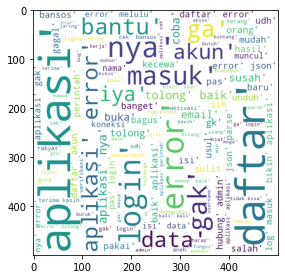

In [18]:
stemm_list = ulasan['stemming'].tolist()
stemm_ls = []
for w in stemm_list:
  stemm_ls += w

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
#content
stemming=wc.generate(str(stemm_ls))
plt.figure(figsize=(4.5,4.5))
plt.imshow(stemming)

Dari hasil di atas, beberapa kata yang sering disebutkan, yaitu aplikasi, error, login, daftar, gak, masuk, bantu, susah, dan sebagainya. 
Hasil di atas dapat digunakan untuk melihat apa error yang dihasilkan oleh aplikasi dan dibagian mana. 

#### Bar Chart
Bar chart ini digunakan untuk melihat perbandingan antara jumlah label positive, negative, dan neutral

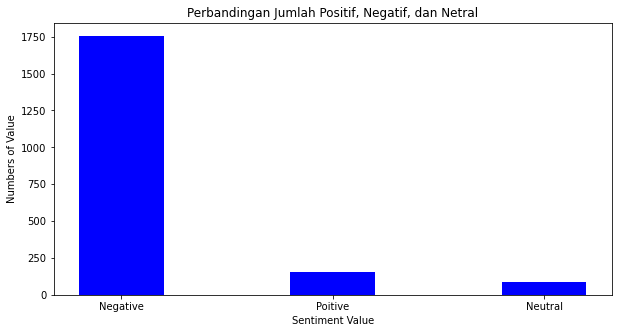

In [19]:
negative_label = (ulasan[ulasan['label'] == 'Negative']['label']).count()
positive_label = (ulasan[ulasan['label'] == 'Positive']['label']).count()
neutral_label = (ulasan[ulasan['label'] == 'Neutral']['label']).count()

# set(ulasan['label'])

label = ['Negative', 'Poitive', 'Neutral']
values = [negative_label, positive_label, neutral_label]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(label, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Sentiment Value")
plt.ylabel("Numbers of Value")
plt.title("Perbandingan Jumlah Positif, Negatif, dan Netral")
plt.show()

### Pembobotan TF-IDF
Pada tahap ini dilakukan pembobotan kata dari hasil stemming dengan metode Term Inverse Document Frequency (TF-IDF).
<br />
Metode TF-IDF digunakan untuk mengetahui seberapa sering suatu kata muncul di dalam dokumen. Tahap ini dibantu dengan library sklearn.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = ulasan['stemming']
Y = ulasan['label']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=64)

nnn = x_test[1090]
print(nnn)

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

print("ASEM")
print(vectorizer.transform(nnn))

['rekam', 'data', 'mohon', 'bantu', 'biar', 'aplikasi', 'cepat']
ASEM
  (0, 1062)	0.6205429174618894
  (0, 523)	0.5635859145534963
  (0, 1)	0.5452498551167032
  (1, 1814)	0.45912361330846063
  (1, 1)	0.8883723924698376
  (2, 1062)	1.0
  (3, 1814)	0.7187014651906984
  (3, 1)	0.6953187786423888
  (4, 709)	0.7187014651906984
  (4, 1)	0.6953187786423888
  (5, 1597)	0.3282107851378952
  (5, 1359)	0.31058874525803826
  (5, 969)	0.3282107851378952
  (5, 709)	0.5961714179732683
  (5, 1)	0.5767752012258439
  (6, 1814)	0.49865312158452857
  (6, 1359)	0.5195688444053761
  (6, 523)	0.49865312158452857
  (6, 1)	0.48242962656875954


### SVM
Klasifikasi ulasan pengguna dilakukan menggunakan algoritma Support Vector Machine yang akan dibantu dengan library Scikit-Learn. Proses klasifikasi menggunakan nilai data latih dan data uji sebesar 70%:30%, dilakukan percobaan sebanyak 15x dan kernel akan menggunakan kernel rbf.

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

SVM = svm.SVC(kernel='rbf', probability=True)
SVM.fit(x_train,y_train)

y_pred_svm = SVM.predict(x_test)

acc_score = cross_val_score(SVM, x_train, y_train, cv=15, scoring='accuracy')

print('Hasil Rata - Rata Accuracy : %s' % acc_score.mean())

Hasil Rata - Rata Accuracy : 0.8864409364752533


### Naive Bayes
Klasifikasi ulasan pengguna dilakukan menggunakan algoritma Naive Bayes Clasifier yang akan dibantu dengan library Scikit-Learn. Proses klasifikasi menggunakan nilai data latih dan data uji sebesar 70%:30%, dilakukan percobaan sebanyak 15x.

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(x_train, y_train)

y_pred_nb = mnb.predict(x_test)

# Evaluasi akurasi data training
acc_score_nb = cross_val_score(mnb, x_train, y_train, cv=15, scoring='accuracy')
# acc_test = accuracy_score(y_test, y_pred_nb)

# Print hasil evaluasi
print(f'Hasil akurasi data test: {acc_score_nb.mean()}')

Hasil akurasi data test: 0.8842903988408447


### Visualisasi Hasil Akurasi
Pada tahap ini akan dilihat pada visualisasi hasil akurasi menggunakan line chart. 
<br />
Pembuatan line chart ini menggunakan bantuan dari matplotlib.pyplot

#### Visualisasi Hasil Akurasi SVM

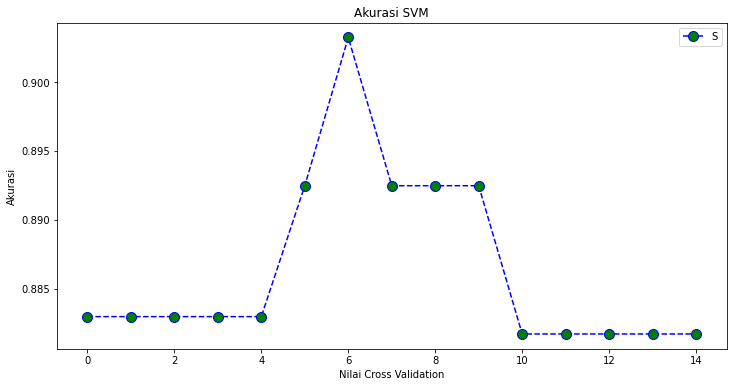

In [30]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, 15), acc_score, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Akurasi SVM')  
plt.xlabel('Nilai Cross Validation')  
plt.ylabel('Akurasi')
# plt.ylim(ymin=0, ymax=1)
plt.legend('SVM')

#### Visualisasi Hasil Akurasi Naive Bayes

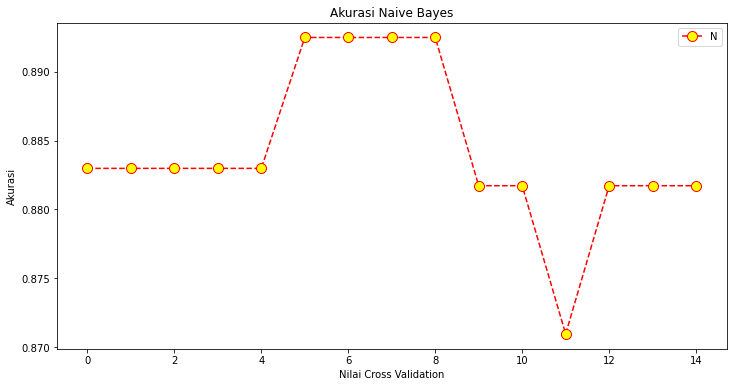

In [31]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, 15), acc_score_nb, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Akurasi Naive Bayes')  
plt.xlabel('Nilai Cross Validation')  
plt.ylabel('Akurasi')
# plt.ylim(ymin=0, ymax=1)
plt.legend('Naive Bayes')

#### Perbandingan SVM dan Naive Bayes

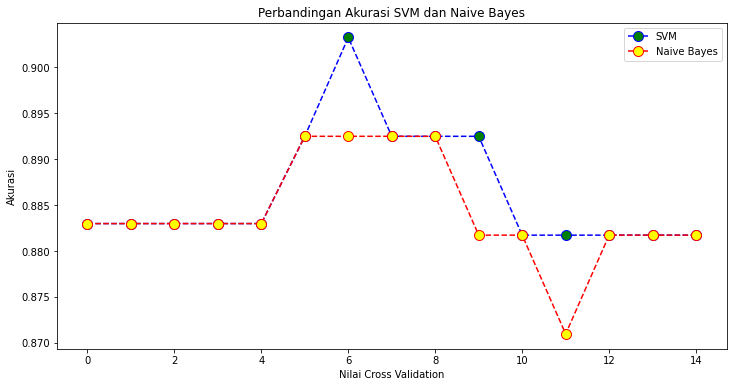

In [32]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, 15), acc_score, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.plot(range(0, 15), acc_score_nb, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Perbandingan Akurasi SVM dan Naive Bayes')  
plt.xlabel('Nilai Cross Validation')  
plt.ylabel('Akurasi')
# plt.ylim(ymin=0, ymax=1)
plt.legend(['SVM', 'Naive Bayes'])

### Classification Report
Classification Report digunakan untuk menunjukkan precision, recall, F1-score, dan support dari model klasifikasi.
<br />
Proses ini menggunakan bantuan scikit learn.

In [33]:
from sklearn.metrics import classification_report

print('SVM')
print(classification_report(y_test, y_pred_svm))
print('Naive Bayes')
print(classification_report(y_test, y_pred_nb))

SVM
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       516
           1       0.00      0.00      0.00        36
           2       1.00      0.02      0.04        48

    accuracy                           0.86       600
   macro avg       0.62      0.34      0.32       600
weighted avg       0.82      0.86      0.80       600

Naive Bayes
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       516
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        48

    accuracy                           0.86       600
   macro avg       0.29      0.33      0.31       600
weighted avg       0.74      0.86      0.80       600



C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\

### Kesimpulan
Dari penelitian ini dapat disimpulkan bahwa dalam kasus analisis sentimen dengan dataset berupa ulasan pengguna dari play store algoritma Support Vector Machine (SVM) dengan akurasi 88.6% lebih baik 0.2% jika dibandingkan dengan algoritma Naïve Bayes Classifier yang memiliki akuasi sebesar 88.4%.